In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/"

In [3]:
digits_train = pd.read_csv(URL+"/optdigits.tra",header=None)
digits_test = pd.read_csv(URL+"/optdigits.tes",header=None)

In [4]:
x_train = digits_train[np.arange(64)]
y_train = digits_train[64]

In [5]:
x_test = digits_test[np.arange(64)]
y_test = digits_test[64]

### PCA (Principal Component Analysis)

In [21]:
estimator = PCA(n_components=3)
x_train_pca = estimator.fit_transform(x_train)
x_test_pca = estimator.transform(x_test)

作3维度空间分布图

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def plot_pca_scatter():
    colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(len(colors)):
        px = x_train_pca[:,0][y_train.as_matrix()==i]
        py = x_train_pca[:,1][y_train.as_matrix()==i]
        pz = x_train_pca[:,2][y_train.as_matrix()==i]
        ax.scatter(px,py,pz,c=colors[i])
    
    ax.set_zlabel('Third Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_xlabel('First Principal Component')
    ax.legend(np.arange(0,10).astype(str))
#     ax.view_init(50,50)

    plt.show()

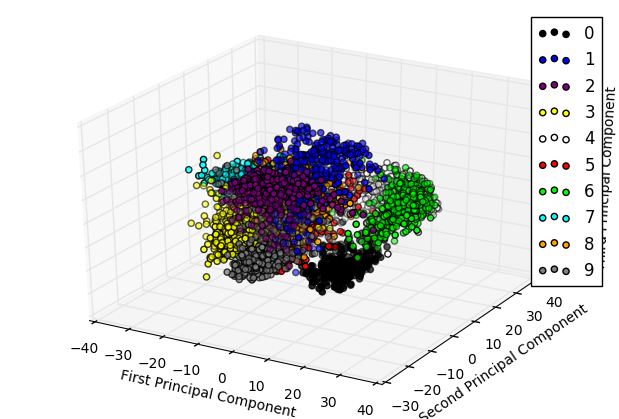

In [34]:
# plt.figure(figsize=(15,15,15))
plot_pca_scatter()

### PCA压缩后的图像识别的精度损失 从64维度降到20维度，识别准确率下降了不到1%

In [46]:
estimator = PCA(n_components=20)
x_train_pca = estimator.fit_transform(x_train)
x_test_pca = estimator.transform(x_test)

In [40]:
x_train.shape

(3823, 64)

In [35]:
x_train_pca.shape

(3823, 3)

In [36]:
x_test_pca.shape

(1797, 3)

In [37]:
y_train.shape

(3823,)

In [38]:
y_test.shape

(1797,)

In [39]:
from sklearn.svm import LinearSVC

In [47]:
svc = LinearSVC()
svc.fit(x_train,y_train)
y_test_pred = svc.predict(x_test)

In [48]:
pca_svc = LinearSVC()
pca_svc.fit(x_train_pca,y_train)
y_test_pred_pca = pca_svc.predict(x_test_pca)

In [49]:
print("原始图像的分类准确率",svc.score(x_test,y_test))

原始图像的分类准确率 0.9309961046188091


In [50]:
print("PCA压缩后的图像的分类准确率",pca_svc.score(x_test_pca,y_test))

PCA压缩后的图像的分类准确率 0.9237618252643295


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.86      0.93      0.90       182
          2       0.99      0.95      0.97       177
          3       0.97      0.91      0.94       183
          4       0.95      0.96      0.95       181
          5       0.90      0.96      0.93       182
          6       0.99      0.97      0.98       181
          7       0.98      0.91      0.94       179
          8       0.81      0.87      0.84       174
          9       0.88      0.86      0.87       180

avg / total       0.93      0.93      0.93      1797



In [55]:
print(classification_report(y_test,y_test_pred_pca))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       178
          1       0.91      0.83      0.87       182
          2       0.99      0.98      0.98       177
          3       0.96      0.89      0.93       183
          4       0.91      0.96      0.94       181
          5       0.86      0.98      0.92       182
          6       0.97      0.97      0.97       181
          7       0.95      0.90      0.93       179
          8       0.91      0.87      0.89       174
          9       0.81      0.91      0.85       180

avg / total       0.93      0.92      0.92      1797

